In [ ]:
# philip walsh
# philipwalsj.ds@gmail.com
# 2019-12-21
# Digit Recognizer from https://www.kaggle.com/c/digit-recognizer/data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
import winsound
def alert_me(num_beeps):
    frequency = 2500  # Set Frequency To 2500 Hertz
    duration = 500  # Set Duration To 1000 ms == 1 second

    for n in range(1,num_beeps+1):
        winsound.Beep(frequency, duration)



In [2]:

train_data = pd.read_csv("excluded/train.csv")

In [3]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
label_df=train_data[['label']]

In [5]:
train_data.drop('label', axis=1, inplace=True)

In [6]:
label_df['label'].head(4)

0    1
1    0
2    1
3    4
Name: label, dtype: int64

In [7]:
# Get rid of $ and , in the SAL-RATE, then convert it to a float
def char_to_ascii(any_char):
    return ord(str(any_char))

In [37]:
# Get rid of $ and , in the SAL-RATE, then convert it to a float
def ascii_to_char(any_num):
    return chr(any_num)

In [36]:
chr(52)

'4'

In [8]:
ascii_df = label_df['label'].apply(char_to_ascii)

In [9]:
ascii_df.head(4)

0    49
1    48
2    49
3    52
Name: label, dtype: int64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(train_data, ascii_df, test_size=0.20, random_state=9261774)

In [14]:
X_train.shape,y_train.shape

((33600, 784), (33600,))

In [15]:
X_test.shape, y_test.shape

((8400, 784), (8400,))

In [16]:
k_range = range(1,9)
scores={}
scores_list=[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list.append(scores[k])
print('done scoring')
alert_me(5)

done scoring


In [17]:
# take a peek at the scores
scores

{1: 0.9648809523809524,
 2: 0.9575,
 3: 0.9651190476190477,
 4: 0.9658333333333333,
 5: 0.9651190476190477,
 6: 0.9647619047619047,
 7: 0.9627380952380953,
 8: 0.9628571428571429}

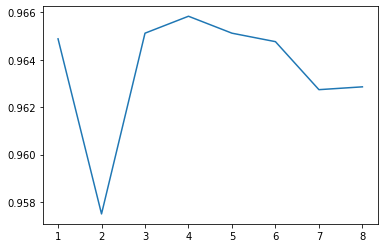

In [18]:
# plot the scores against the range value
plt.plot(k_range, scores_list)
plt.show()

In [19]:
# take the best score, and plop it into here
best_k=4

In [20]:
knn = KNeighborsClassifier(n_neighbors = best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [ ]:
# predict against the train data to find the residuals

In [21]:
predicted = knn.predict(X_train)

In [22]:
expected = y_train

In [25]:
pd.DataFrame(y_train).head()

,label
41960,49
6974,55
17977,51
23002,50
23953,48


In [27]:
pd.DataFrame(predicted).head()

,0
0,49
1,55
2,51
3,50
4,48


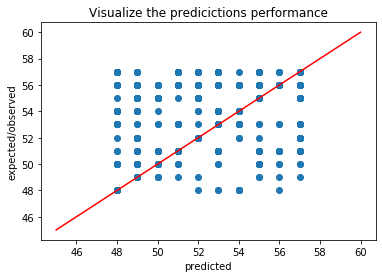

In [23]:
# plot the predicted vs the expected.  
# how well did the model perform
plt.plot([45,60],[45,60], color='red')
plt.title('Visualize the predicictions performance')
plt.xlabel('predicted')
plt.ylabel('expected/observed')
plt.scatter(predicted, expected)

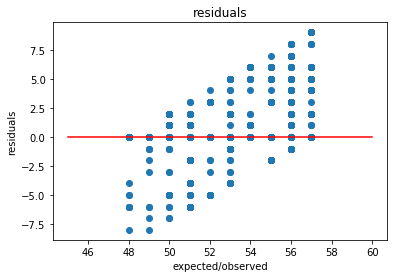

In [24]:
residuals = np.array(expected.values.ravel()) - predicted
plt.title('residuals')
plt.xlabel('expected/observed')
plt.ylabel('residuals')
plt.plot([45,60],[0,0], color='red')
plt.scatter(expected, residuals)
# a good residual plot does not have a pattern

In [ ]:
# now predict it against the test data, find our errors

In [28]:
predicted = knn.predict(X_test)

In [32]:
pd.DataFrame(predicted).head()

,0
0,53
1,49
2,56
3,50
4,57


In [29]:
expected = y_test

In [33]:
pd.DataFrame(expected).head()

,label
31849,53
34362,49
28860,56
572,50
33572,57


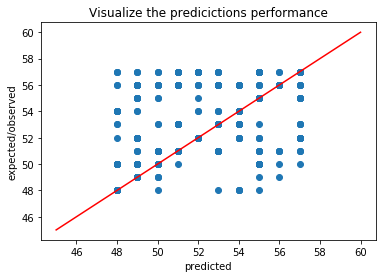

In [30]:
# plot the predicted vs the expected.  
# how well did the model perform
plt.plot([45,60],[45,60], color='red')
plt.title('Visualize the predicictions performance')
plt.xlabel('predicted')
plt.ylabel('expected/observed')
plt.scatter(predicted, expected)

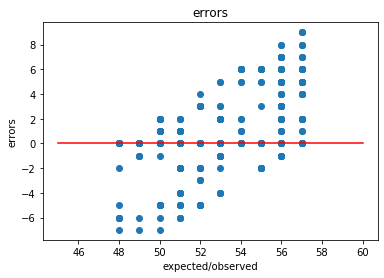

In [31]:
errors = np.array(expected.values.ravel()) - predicted
plt.title('errors')
plt.xlabel('expected/observed')
plt.ylabel('errors')
plt.plot([45,60],[0,0], color='red')
plt.scatter(expected, errors)
# a good error plot does not have a pattern

In [ ]:
# lets predict the submission data

In [41]:
test_data = pd.read_csv("excluded/test.csv")

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
test_data

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
predicted = knn.predict(test_data)

In [45]:
pd.DataFrame(predicted).head()

,0
0,50
1,48
2,57
3,52
4,51


In [46]:
#tack the saved labes (y's) onto the preds into a data frame
pred_rf=pd.DataFrame(predicted, columns=['ascii'])

In [47]:
pred_rf.head()

,ascii
0,50
1,48
2,57
3,52
4,51


In [54]:
submission_df = pd.DataFrame(pred_rf['ascii'].apply(ascii_to_char))
submission_df.head()

,ascii
0,2
1,0
2,9
3,4
4,3


In [55]:
submission_df.index += 1

In [56]:
submission_df['ImageId'] = submission_df.index

In [58]:
submission_df.columns=['Label','ImageId']
submission_df.head()

,Label,ImageId
1,2,1
2,0,2
3,9,3
4,4,4
5,3,5


In [59]:
submission_df[['ImageId','Label']].to_csv('excluded/knn-test-submission.csv',index=False)